# Plotting for long term lighting tests
Data was taken using the Thorlabs PM100USB and from MCU logs via serial.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/6HourTest.csv')
df["hour"] = df.index /3600
sns.set_theme(style="darkgrid")


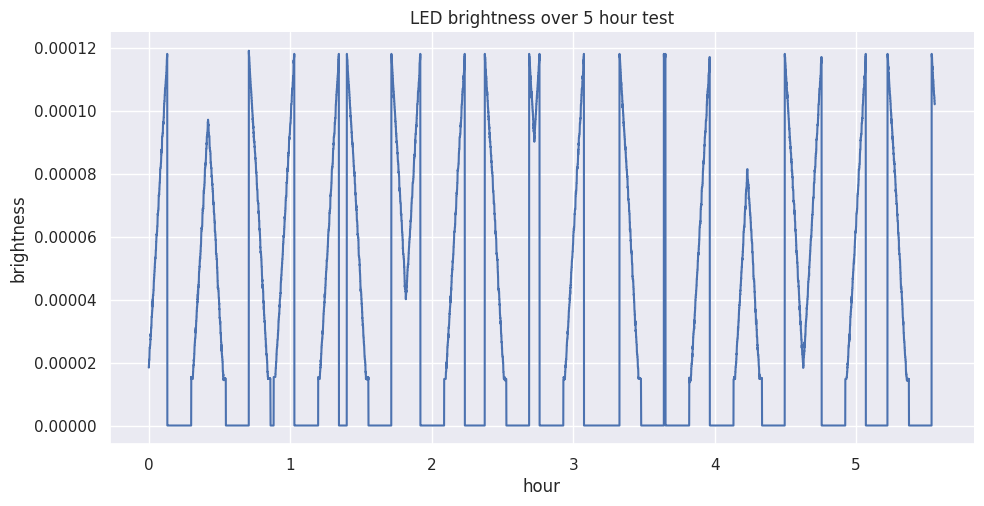

In [3]:
sns.relplot(df, x="hour", y="brightness", kind="line", aspect=2).set(title="LED brightness over 5 hour test")

This plots shows eratic and unexpected behavior. We do not expect to see such sudden drops or jumps in brightness. This suggests overflowing of variables or another bug somewhere.

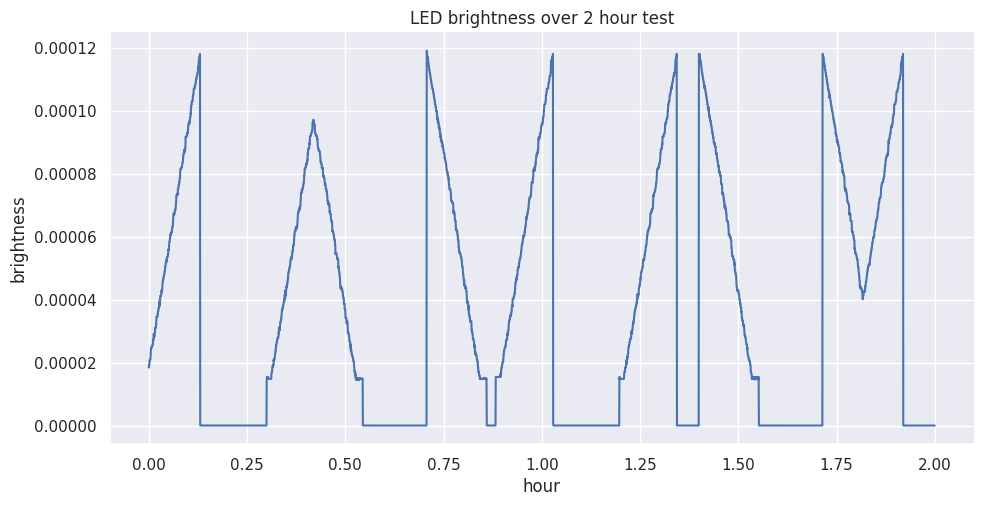

In [4]:
df_two_hours = df.iloc[0:7200]
sns.relplot(df_two_hours, x="hour", y="brightness", kind="line", aspect=2).set(title="LED brightness over 2 hour test")

The strange behavior is observed again here. We expect to see more uniform cycles

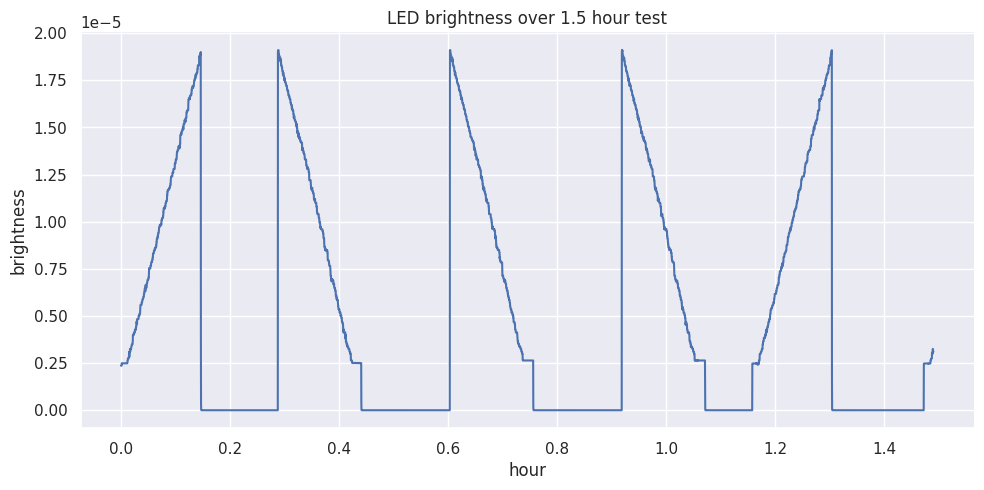

In [5]:
df2 = pd.read_csv('data/3HourTest.csv')
df2["hour"] = df2.index /3600
sns.relplot(df2, x="hour", y="brightness", kind="line", aspect=2).set(title="LED brightness over 1.5 hour test")

It appears that our system cannot hold the brightness at a maximum value. This suggests a bug

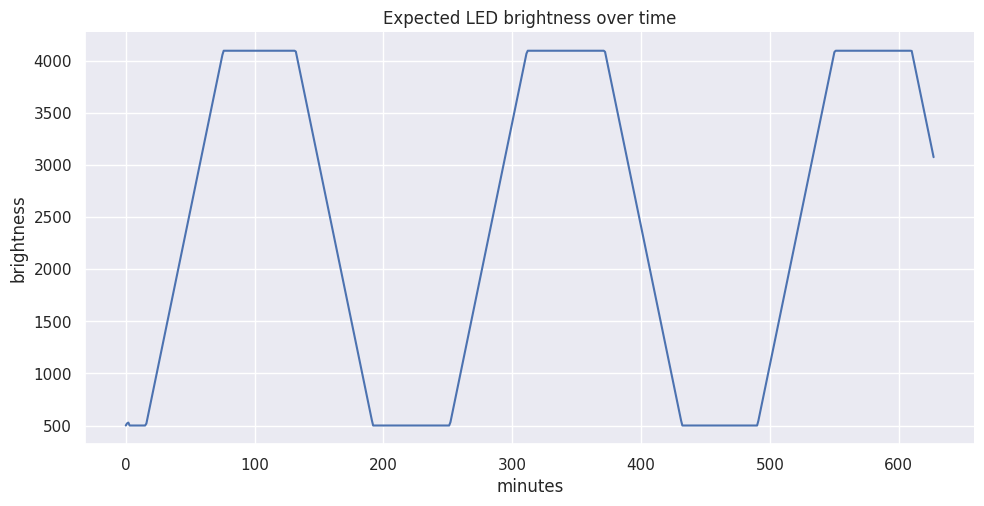

In [10]:
df3 = pd.read_csv('data/v1.1LogTest.csv')
df3["index"] = df3.index
sns.relplot(df3, x="index", y="brightness", kind="line", aspect=2).set(title="Expected LED brightness over time", xlabel="minutes")

This test was taken after adding a real time clock to account for the bugs we were facing when using millis() for our timing. This shows nice uniform sunrise and sunset as well as the ability to hold brightness. This test was taken using log data.

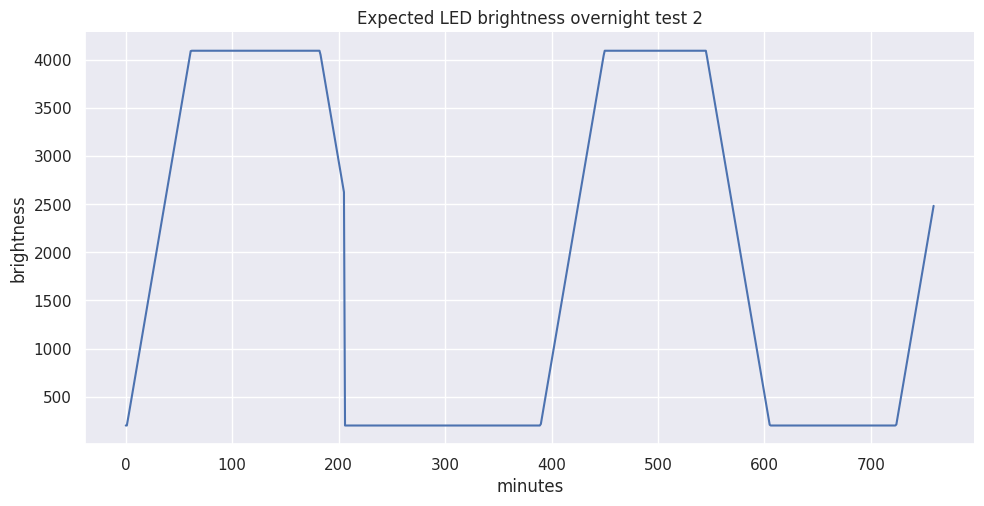

In [11]:
df4 = pd.read_csv('data/v1.1LogTest2.csv')
df4["index"] = df4.index
sns.relplot(df4, x="index", y="brightness", kind="line", aspect=2).set(title="Expected LED brightness overnight test 2", xlabel="minutes")

This plot shows generally good behavior, but a bug was observed at midnight where the brightness suddenly drops to 0. This was a result of elapsed seconds getting longer than expected based on our hour calculations. 

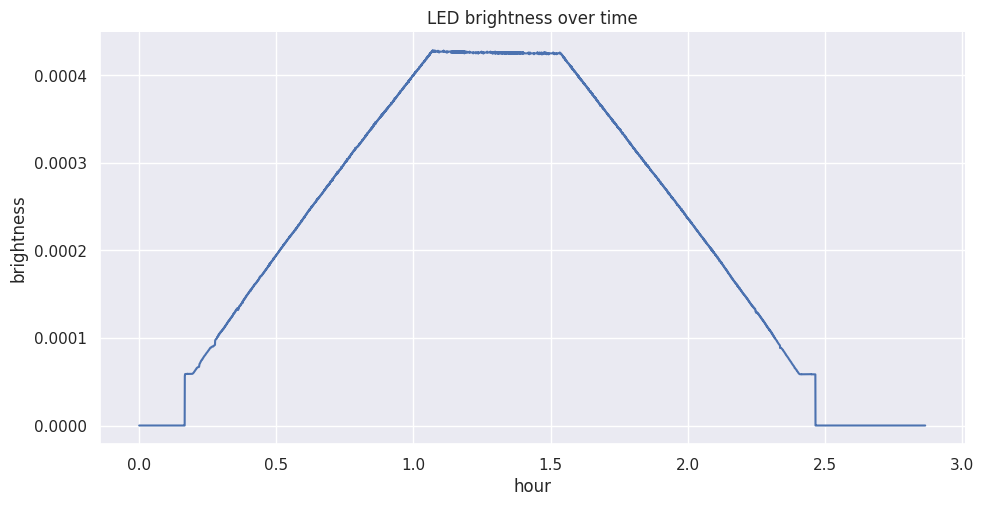

In [8]:
df4 = pd.read_csv('data/v1.1Test.csv')
df4["hour"] = df4.index /3600
sns.relplot(df4, x="hour", y="brightness", kind="line", aspect=2).set(title="LED brightness over time")

This plot shows the measured brightness of an actual light over an hour long sunrise and sunset. This test shows that the light and code is performing as expected.